ANA06 - Autor: Cader Fernanda

Umbralización global: Aplica una umbralización global a tu imagen utilizando un valor de umbral fijo. Prueba con diferentes valores de umbral y observa cómo cambian los resultados.

Umbralización global

In [27]:
import cv2 
from matplotlib import pyplot as plt 
from matplotlib.offsetbox import AnchoredOffsetbox
import numpy as np 

img = cv2.imread("monedas_arg.jpg",0) 
#achicar imagen
ancho=1000
alto=600

img = cv2.resize(img,(ancho, alto), cv2.INTER_CUBIC)

#Guardar imagen achicada
cv2.imwrite('monedas_chicas.jpg',img)

#cv2.threshold(imagen, valor de umbral, valor máximo, tipo de algoritmo de umbral), devuelve el umbral establecido y la imagen binarizada

_, th = cv2.threshold(img, 80, 255, cv2.THRESH_BINARY)

cv2.imshow("Imagen Original",img) 
cv2.imshow("Imagen Binarizada", th)

cv2.waitKey(0) 
cv2.destroyAllWindows()


Umbralización adaptativa: Aplica una umbralización adaptativa a tu imagen utilizando los métodos de la media y gaussiano. Compara los resultados con los obtenidos en la umbralización global.

Umbralización adaptativa

In [22]:
kernel = 3
constante =2
    
cv2.namedWindow('Binarizada') ##creamos la ventana llamada binarizando
img = cv2.imread("monedas_chicas.jpg", 0) ##leemos la imagen coins.png como escala de grises y la guardamos en la variable img


# Podemos aplicar una umbralización adaptativa gaussiana a la imagen de entrada y le pasamos los valores de kernel y constante
umbralizada = cv2.adaptiveThreshold(img, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, kernel, constante)

# o podemos aplicar una umbralización adaptativa de la media a la imagen de entrada y le pasamos los valores de kernel y constante
#umbralizada = cv2.adaptiveThreshold(img, 255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, kernel, constante)

cv2.imshow("Binarizada", umbralizada)## mostamos la imagen umbralizada en la ventana binarizada

cv2.waitKey(0) ##esperamos que se presione cualquier tecla
cv2.destroyAllWindows() ##destruimos las ventanas de opencv

Se puede observar la diferencia entre la umbralizacion global y adaptativa al ver la nitidez de las monedas en la adaptativa, es un método más refinado y con mayor eficacia.

Umbralización de Otsu

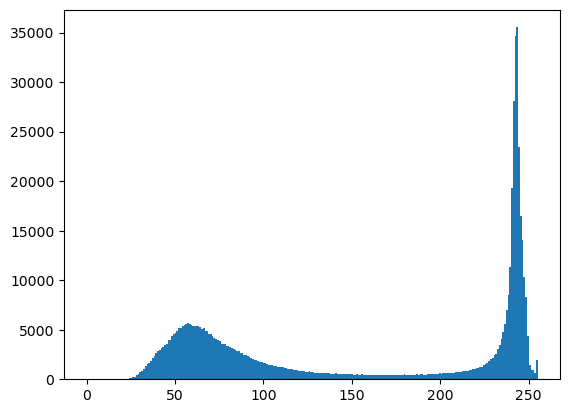

154.0


In [21]:
img = cv2.imread("monedas_chicas.jpg",0)

hist = cv2.calcHist([img], [0], None, [256], [0, 255])
plt.hist(img.ravel(), 256, [0,255]) ## graficamos el histograma, .ravel nos devuelve la matriz en formato plano
plt.show()

# cv2.threshold(imagen, valor de umbral, valor máximo, tipo de algoritmo de umbral), devuelve el umbral establecido y la imagen binarizada

umbral, th = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print(umbral) #imprimimos el umbral calculado por el algoritmo de otsu
# El cual será un histograma con dos picos.

cv2.imshow("original",img)
cv2.imshow("binarizada", th)

cv2.waitKey(0)
cv2.destroyAllWindows()

La umbralización OTSU resaltará los valores en negro, es decir habra mayor presencia y picos de frecuencia en 250 siendo 0 el blanco y 250 el negro.

Umbralización de "Truncar a Cero Invertido"

In [24]:
import cv2
import numpy as np

# Carga la imagen en escala de grises
img = cv2.imread('monedas_chicas.jpg', cv2.IMREAD_GRAYSCALE)

# Define un valor de umbral
thresh = 127

# Aplica la umbralización de "Truncar a Cero Invertido"
ret, thresh_img = cv2.threshold(img, thresh, 255, cv2.THRESH_TOZERO_INV)

# Muestra la imagen original y la imagen umbralizada
cv2.imshow('Imagen Original', img)
cv2.imshow('Imagen Umbralizada', thresh_img)

# Espera a que se presione una tecla y luego cierra las ventanas de las imágenes
cv2.waitKey(0)
cv2.destroyAllWindows()



Se invierte el fondo, el cual era blanco, pasa a ser negro, y el detalle de las letras de las monedas es más significante.

Conclusiones

El metodo que mejor funciono para mi imagen fue la umbralizacion global con un valor de umbral 80, el cual se puede ir modificando manualmente, es viable tambien como se ha enseñado en la clase, establecer una barra de desplazamiento para ir viendo cual es el valor ideal en base al resultado que esté buscando el usuario.

Las dificultades que encontré en este trabajo fue cambiar de tamaño la imagen ya que en un principio la imagen era de 3508x1438 y no era viable para trabajarla y realizar las transformaciones pertinentes, luego ir probando los diferentes tipos de umbralizaciones y poder vislumbrar cuál de todas aquellas me permitia ver mejor el contenido de las monedas.

Estas técnicas facilmente podrian ser aplicadas en seguridad, en cámaras de seguridad para discenir objetos de personas y ver actividad sospechosa en un banco. Otro lugar de aplicacion puede ser para la realizacion de una aplicación de edición de fotos.